In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [7]:
df.columns.tolist()

['uid',
 'asin',
 'title',
 'stars',
 'reviews',
 'price',
 'isBestSeller',
 'boughtInLastMonth',
 'category']

In [8]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


#### Part 1: Understanding Product Categories

1.1 Generate a frequency table for the product category.

In [31]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Proportion (relative frequency) table for 'category'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Motorbike Chassis                         0.000044
 Alexa Built-In Devices  

In [32]:
# Crosstab for product categories
my_table = pd.crosstab(index=df['category'], columns='count')

my_table


col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [33]:
my_table_prop = pd.crosstab(index=df['category'], columns='proportion', normalize=True)
my_table_prop

col_0,proportion
category,
3D Printers,0.000101
3D Printing & Scanning,0.001664
Abrasive & Finishing Products,0.000102
Action Cameras,0.000694
Adapters,0.000104
...,...
Wind Instruments,0.000102
Window Treatments,0.000098
Women,0.007273


In [51]:
frequency_table.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

1.2 Which are the top 5 most listed product categories?

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/cv/pfmqj_4n6fg_b8vt_pytwxwr0000gn/T/ipykernel_64859/798074451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.head(5).index, y=frequency_table.head(5).values, palette="Set3")


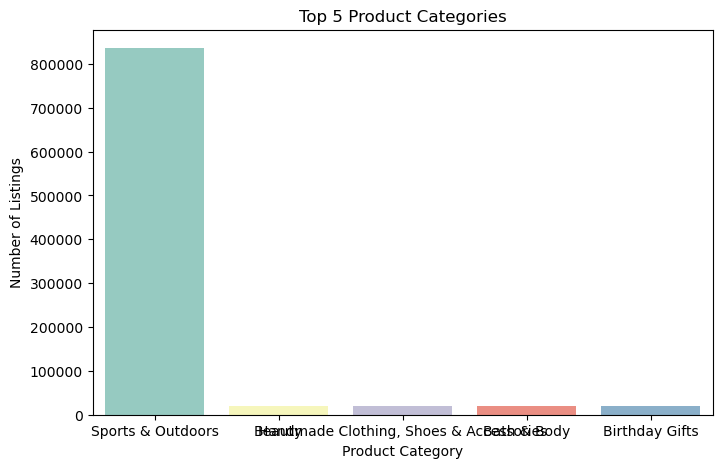

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=frequency_table.head(5).index, y=frequency_table.head(5).values, palette="Set3")
plt.title('Top 5 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.show()

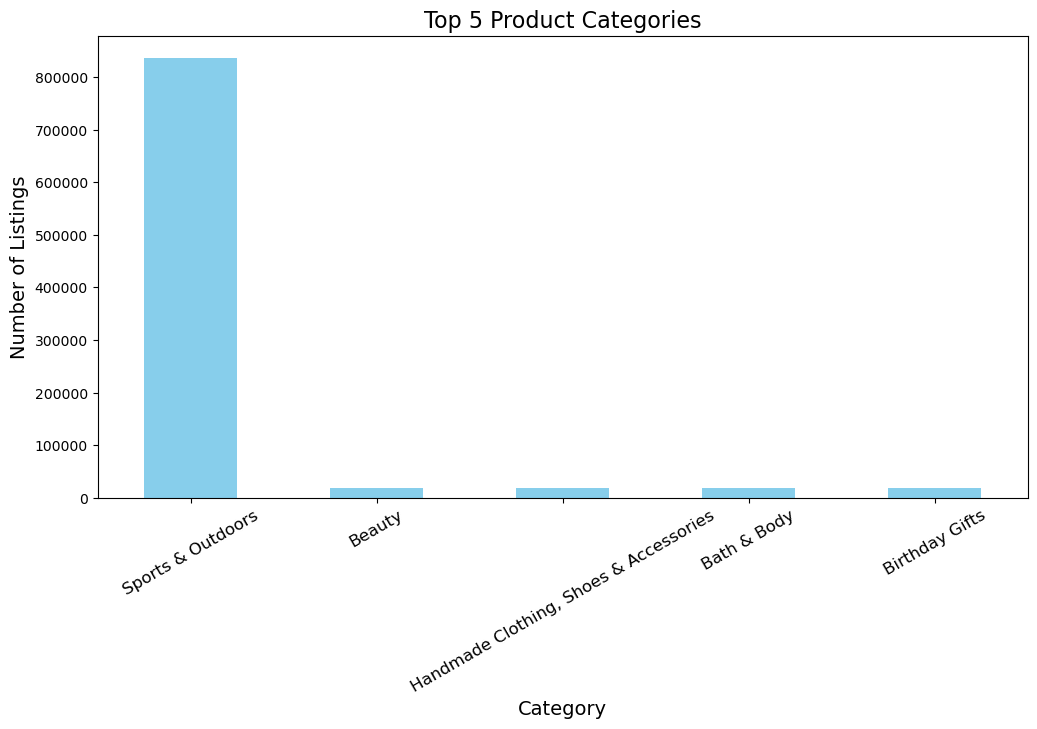

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top5_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Product Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.show()



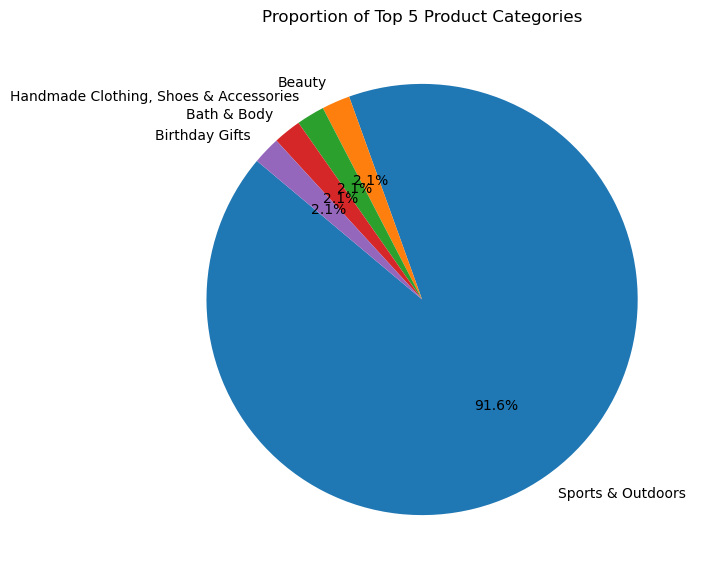

In [12]:
plt.figure(figsize=(7,7))
top5_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 5 Product Categories')
plt.ylabel('')
plt.show()


Question summary
1. Which are the top 5 most listed product categories?

Sports & Outdoors, Beauty, Handmade Clothing, Bath & Body, and Birthday Gifts.

2. Does any category dominate the listings?

Yes, Sports & Outdoors dominates significantly, accounting for the vast majority of all listings. This suggests a heavy focus by sellers and buyers on this category on Amazon UK.

#### Part 2: Delving into Product Pricing

#### Measures of Centrality:

In [19]:
# Check the column name first
df.columns

# Assuming the price column is called 'price'
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]   # mode() returns a Series, take first value

print(f"Mean price: £{mean_price:.2f}")
print(f"Median price: £{median_price:.2f}")
print(f"Mode price: £{mode_price:.2f}")


Mean price: £89.24
Median price: £19.09
Mode price: £9.99


#### Measures of Dispersion

In [20]:
import numpy as np

variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance_price:.2f}")
print(f"Standard Deviation: {std_dev_price:.2f}")
print(f"Range: {price_range:.2f}")
print(f"Interquartile Range (IQR): {iqr_price:.2f}")


Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
Interquartile Range (IQR): 36.00


#### Visualizations:

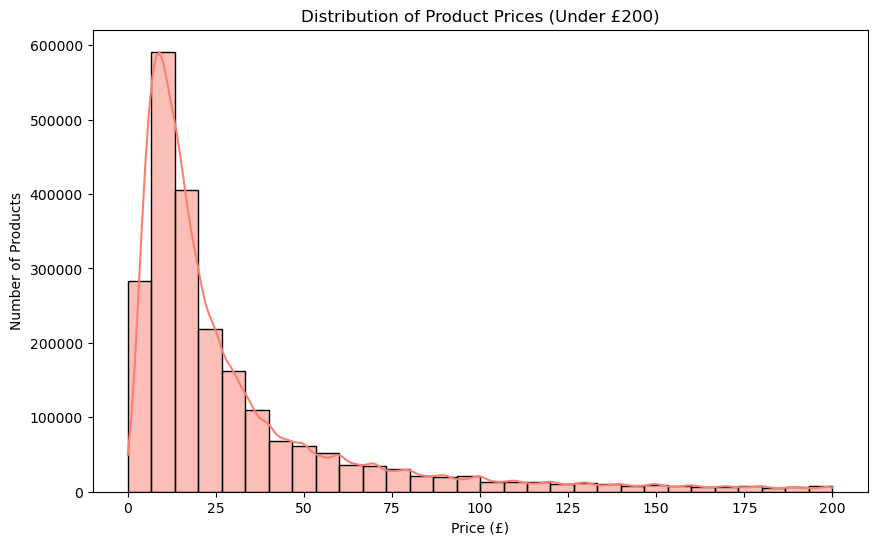

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 200]['price'], kde=True, bins=30, color="salmon")
plt.title('Distribution of Product Prices (Under £200)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()


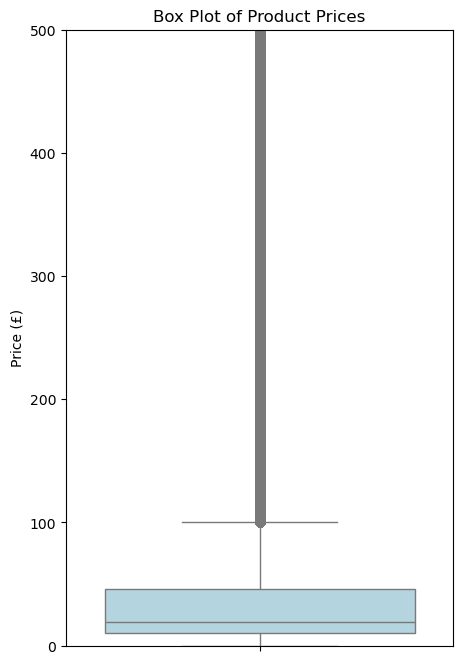

In [30]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['price'], color="lightblue")
plt.title('Box Plot of Product Prices')
plt.ylabel('Price (£)')
plt.ylim(0, 500)  # optional: limit range for readability
plt.show()

Questions summary

The average (mean) price of products listed on Amazon UK is £89.24, while the median price is much lower, at £19.09.
The mode price, or most frequently occurring value, is £9.99.

The measures of spread (such as standard deviation and interquartile range) show that product prices vary widely across the marketplace.

The histogram reveals that most products are clustered below £50, with a strong concentration between £10 and £30.

#### Part 3: Unpacking Product Ratings

In [41]:
# Checking column name first
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [43]:
df['stars'].dtype


dtype('float64')

In [44]:
df['stars'].unique()[:20]

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2])

In [45]:
df["stars"].isnull().sum()

np.int64(0)

In [46]:
# Treat 0 ratings as missing (NaN)
df['stars'] = df['stars'].replace(0, np.nan)

#### Measures of Centrality

In [47]:
# Calculate mean, median, and mode for 'stars' column
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating: {mode_rating:.2f}")

Mean Rating: 4.32
Median Rating: 4.40
Mode Rating: 4.50


#### Measures of Dispersion

In [48]:
# Calculate variance, standard deviation, and interquartile range (IQR)
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Interquartile Range (IQR): {iqr_rating:.2f}")


Variance: 0.31
Standard Deviation: 0.56
Interquartile Range (IQR): 0.50


#### Shape of the Distribution (Skewness & Kurtosis)

In [49]:
from scipy.stats import skew, kurtosis

# Drop missing values to avoid errors
skewness = skew(df['stars'].dropna())
kurt = kurtosis(df['stars'].dropna())

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")


Skewness: -2.38
Kurtosis: 9.78


#### Visualizations:

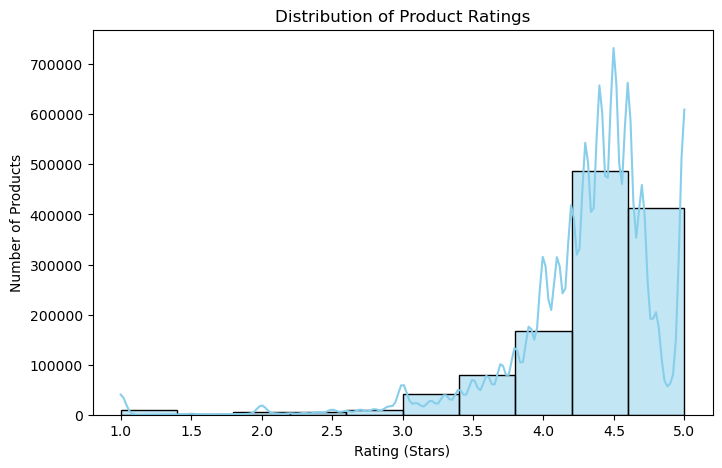

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['stars'], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Products')
plt.show()

Questions summary:

The average (mean) rating across all products is 4.32, while the median rating is slightly higher at 4.40, and the mode rating (most frequent score) is 4.50.

The variance (0.31) and standard deviation (0.56) show low variability in the ratings — most ratings are close to the average of 4.3.

The skewness (-2.38) indicates a strong left-skew, meaning that the majority of ratings are at the higher end (4–5 stars), and only a small number fall in the lower range.

The kurtosis (9.78) is significantly higher than 3, suggesting that the distribution is highly peaked — many ratings are concentrated near the mean, with relatively few moderate or extreme values.